# 01 - Data Exploration

**Goal:** Understand the dataset structure, identify data quality issues, and get initial insights

**What we'll do:**
1. Load the dataset
2. Examine basic statistics
3. Check for missing values
4. Explore data distributions
5. Initial observations

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


## 1. Load the Dataset

In [5]:
# Load the dataset
# Make sure 'Online Retail.xlsx' is in the data/raw/ folder

file_path = '../data/raw/Online Retail.xlsx'

try:
    df = pd.read_excel(file_path)
    print(f'✅ Dataset loaded successfully!')
    print(f'Shape: {df.shape[0]:,} rows × {df.shape[1]} columns')
except FileNotFoundError:
    print('❌ Error: File not found!')
    print('Please download Online Retail.xlsx and place it in data/raw/')
    print('Download from: https://archive.ics.uci.edu/ml/datasets/online+retail')

✅ Dataset loaded successfully!
Shape: 541,909 rows × 8 columns


## 2. First Look at the Data

In [6]:
# Display first few rows
print('First 5 rows:')
df.head()

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Check column names and types
print('Column Information:')
df.info()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Basic statistics
print('Statistical Summary:')
df.describe()

Statistical Summary:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## 3. Check for Missing Values

In [9]:
# Calculate missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})

print('Missing Values:')
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing Values:
             Missing Count  Percentage
CustomerID          135080   24.926694
Description           1454    0.268311


## 4. Explore Key Columns

Let's examine the important columns for our analysis

In [18]:
# Unique values in key columns
print('Unique Values:')
print(f'Unique Invoices: {df["InvoiceNo"].nunique():,}')
print(f'Unique Products: {df["StockCode"].nunique():,}')
print(f'Unique Customers: {df["CustomerID"].nunique():,}')
print(f'Unique Countries: {df["Country"].nunique()}')

Unique Values:
Unique Invoices: 25,900
Unique Products: 4,070
Unique Customers: 4,372
Unique Countries: 38


In [17]:
# Date range
print(f'Date Range:')
print(f'Start Date: {df["InvoiceDate"].min()}')
print(f'End Date: {df["InvoiceDate"].max()}')
print(f'Total Days: {(df["InvoiceDate"].max() - df["InvoiceDate"].min()).days}')

Date Range:
Start Date: 2010-12-01 08:26:00
End Date: 2011-12-09 12:50:00
Total Days: 373


In [16]:
# Check for negative quantities (returns/cancellations)
negative_qty = df[df['Quantity'] < 0]
print(f'Transactions with negative quantity: {len(negative_qty):,} ({len(negative_qty)/len(df)*100:.2f}%)')

Transactions with negative quantity: 10,624 (1.96%)


## 5. Initial Visualizations

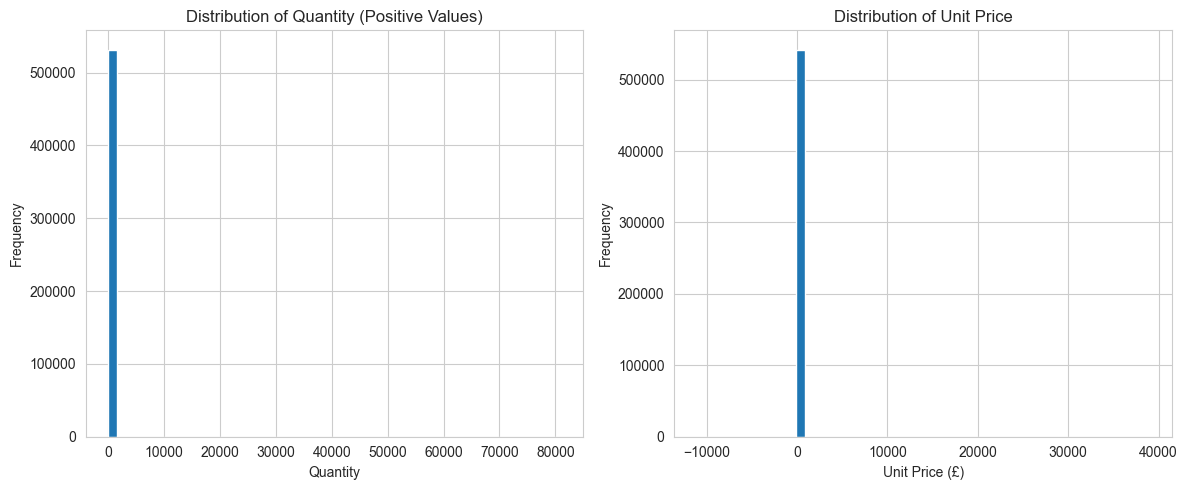

In [13]:
# Distribution of Quantity
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df[df['Quantity'] > 0]['Quantity'].hist(bins=50)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity (Positive Values)')

plt.subplot(1, 2, 2)
df['UnitPrice'].hist(bins=50)
plt.xlabel('Unit Price (£)')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')

plt.tight_layout()
plt.show()

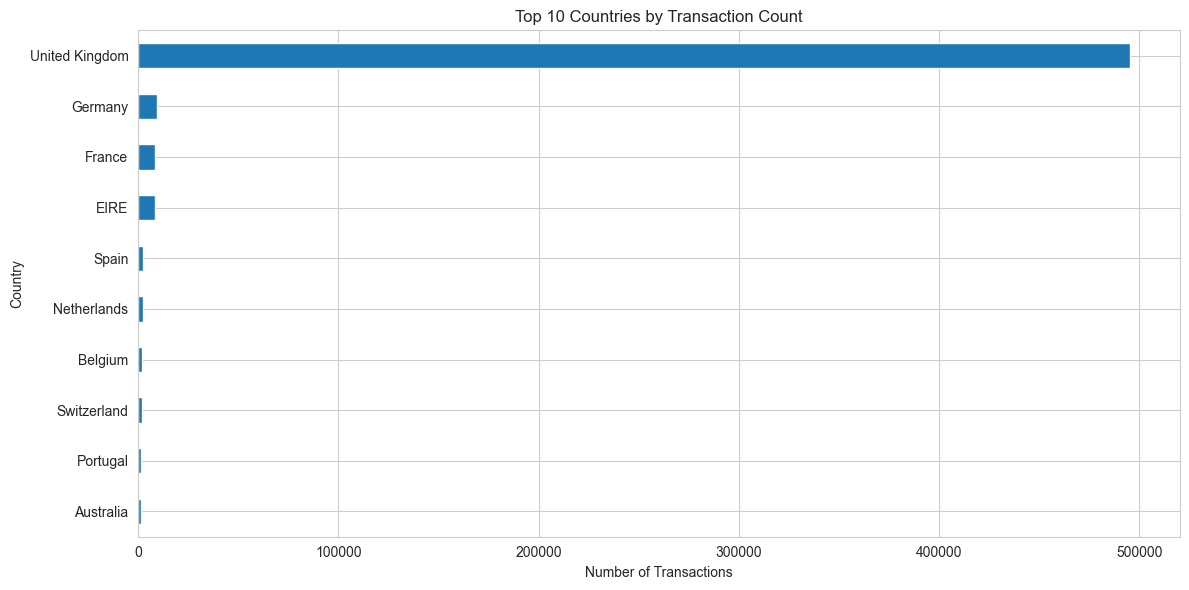

In [14]:
# Top 10 countries by transaction count
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='barh')
plt.xlabel('Number of Transactions')
plt.title('Top 10 Countries by Transaction Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Data Quality Issues:
- 25% of transactions are missing CustomerID - major concern for customer analysis
- Small number of missing product descriptions (0.3%)
- 2% of transactions have negative quantities (returns)

### Interesting Patterns:
- UK heavily dominates transactions (appears to be 90%+ of business)
- Transaction period spans exactly 1 year
- Wide variety of products (4,070 unique items)

### Questions for Further Analysis:
- Why are 25% of transactions missing CustomerID?
- What's the return rate by product/country?
- How does UK vs international customer behavior differ?
- What are the most/least popular products?

### Next Steps:
- Decide how to handle missing CustomerIDs
- Separate returns from purchases
- Create customer segments (UK vs International)
- Calculate revenue metrics
- Build funnel stages

---
**Next:** Open `02_data_cleaning.ipynb` to clean and prepare the data for analysis